### Case Study: HELP International NGO

**Scenario:** HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent funding programmes, they have been able to raise around $ 10 million.

**Problem Statement:** CEO of this orgnization needs to decide how to spend this money strategically and effectively, and they want to make a decision on choosing the countries that are in dire need of this money. Countries are need to be categorized into developed and under-developed based on socio-economic and health factors. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading and Understanding the dataset
ngo = pd.read_csv('Country-data.csv')
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
ngo.shape

(167, 10)

In [4]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Observations:
- There are no missing values in the data.
- No need to do any changes in the datatypes.
- Description of the numeric variables is looking fine except few variables such as income, gdpp seems to have an outliers which will try to look at later stage. 

### Data cleaning:
Converting exports, health and imports columns to absolute values as those are currently in %ages.

In [6]:
ngo['exports'] = ngo['exports'] * ngo['gdpp'] / 100
ngo['health'] = ngo['health'] * ngo['gdpp'] / 100
ngo['imports'] = ngo['imports'] * ngo['gdpp'] / 100

In [7]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Exploring data

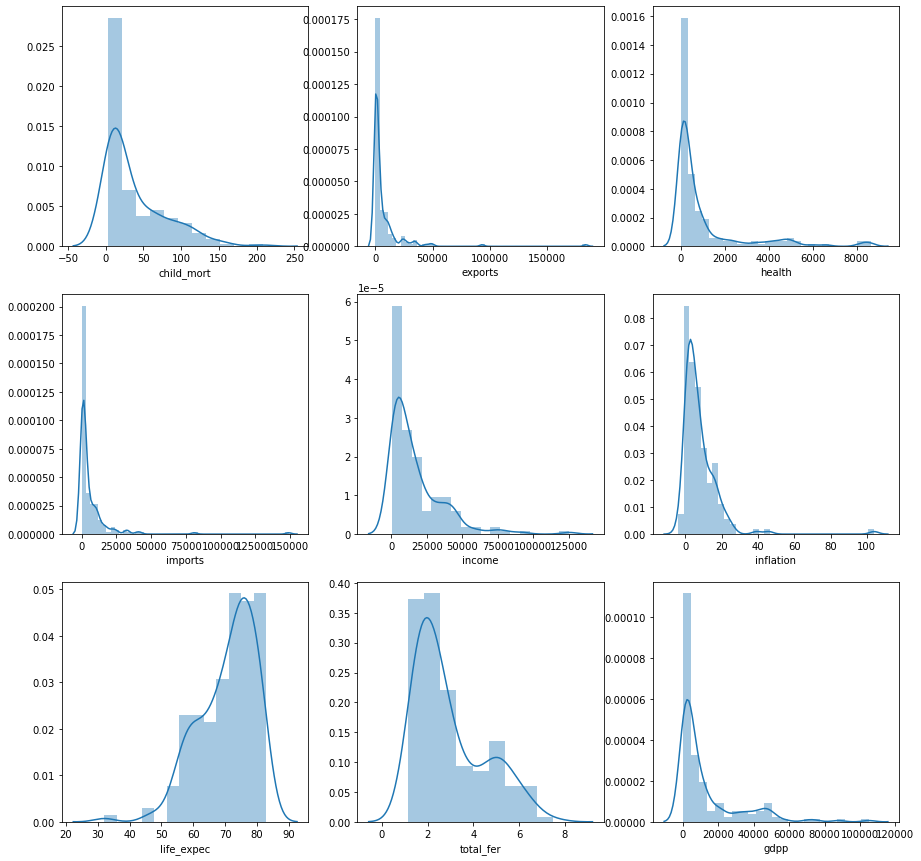

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.distplot(ngo['child_mort'])
plt.subplot(3,3,2)
sns.distplot(ngo['exports'])
plt.subplot(3,3,3)
sns.distplot(ngo['health'])
plt.subplot(3,3,4)
sns.distplot(ngo['imports'])
plt.subplot(3,3,5)
sns.distplot(ngo['income'])
plt.subplot(3,3,6)
sns.distplot(ngo['inflation'])
plt.subplot(3,3,7)
sns.distplot(ngo['life_expec'])
plt.subplot(3,3,8)
sns.distplot(ngo['total_fer'])
plt.subplot(3,3,9)
sns.distplot(ngo['gdpp'])
plt.show()

### Observation:
- For most of the variables, data is left skewed (except for 'life_expec' which is excpected). Though data is not exactly normally distributed towards centre but we can say that its normally distributed towards left.
- From the above distribution/distplots, we can infer that large amount of countries are either developing or under-deveopled.
- We need to check the outliers in terms of how far data is distributed towards right (i.e. developed countries) and see if we can control/remove them.

In [9]:
cols = list(ngo.columns[1:])
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

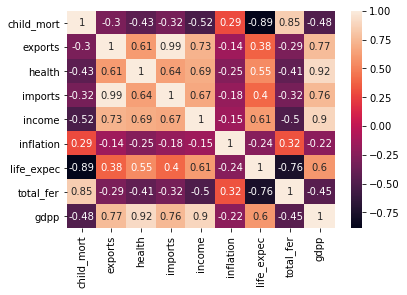

In [10]:
sns.heatmap(ngo[cols].corr(),annot=True);

#### Observations: 
- gdpp and income are highly correlated.
- child_mort and total_fer are highly correlated.
- child_mort and life_expec are highly correlated (negatively).
- imports and exports are highly correlated.
- No action is needed, this is done just to see how variables are correlated to each others.

#### Checking Outliers

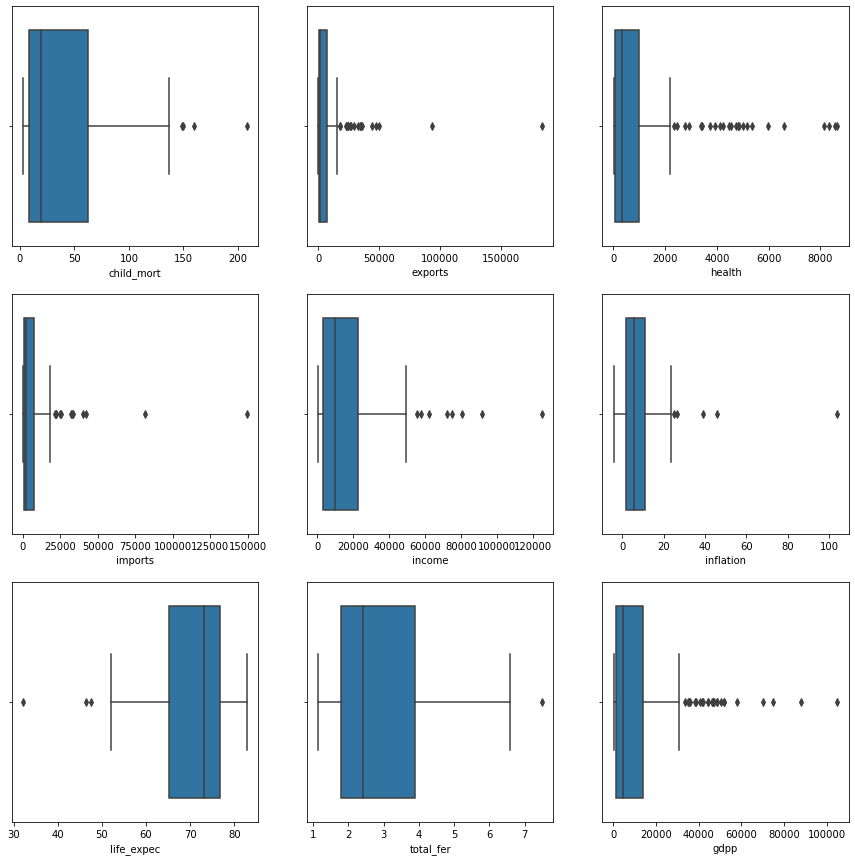

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(ngo['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(ngo['exports'])
plt.subplot(3,3,3)
sns.boxplot(ngo['health'])
plt.subplot(3,3,4)
sns.boxplot(ngo['imports'])
plt.subplot(3,3,5)
sns.boxplot(ngo['income'])
plt.subplot(3,3,6)
sns.boxplot(ngo['inflation'])
plt.subplot(3,3,7)
sns.boxplot(ngo['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(ngo['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(ngo['gdpp'])
plt.show()


#### Comments/Observations:
- Looking at the boxplots, we can see outliers in most of the variables and we need to look into each of the variable one by one to understand them in detail. However we can see major chunk of outliers in 'income' and 'gdpp' variables.

In [12]:
# Looking into 'child_mort' : Death of children under 5 years of age per 1000 live births
ngo['child_mort'].describe(percentiles= [.25,.5,.75,.9,.99])

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
90%      100.220000
99%      153.400000
max      208.000000
Name: child_mort, dtype: float64

In [13]:
ngo[ngo['child_mort']> np.percentile(ngo['child_mort'],99)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


#### Obeservation: 
- 'child_mort' data has only couple of obervations more than 99% percentiles but the values seems to be fair by looking at other variables and we can not remove them from the data as its a very important feature and it may have an impact on our model. 

In [14]:
# Looking into 'exports': Exports of goods and services per capita. Given as %age of the GDP per capita
ngo['exports'].describe(percentiles= [.25,.5,.75,.9,.95])

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
90%       17760.600000
95%       31385.100000
max      183750.000000
Name: exports, dtype: float64

In [15]:
ngo[ngo['exports']>np.percentile(ngo['exports'],99)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


#### Observation: 
- Just couple of observtions outside the range of 99% percentile and we can ignore these outliers as they are just few and also we may not be using this variable for our model building.

In [16]:
# Looking into 'imports': Imports of goods and services per capita. Given as %age of the GDP per capita
ngo['imports'].describe(percentiles= [.25,.5,.75,.9,.95])

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
90%       15034.280000
95%       24241.560000
max      149100.000000
Name: imports, dtype: float64

In [17]:
ngo[ngo['imports']>np.percentile(ngo['imports'],99)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


#### Observations: 
- Similar to 'exports' variable, we have couple of observtions outside the range of 99% percentile and we can ignore these outliers as they are just few and also we may not be using this variable for our model building.

In [18]:
# Looking into 'income': Net income per person
ngo['income'].describe(percentiles=[.25,.5,.75,.90,.99])

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
90%       41220.000000
99%       84374.000000
max      125000.000000
Name: income, dtype: float64

In [19]:
ngo[ngo['income'] > np.percentile(ngo['income'],99) ]
#?np.percentile

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300


#### Observation: 
- Since this is an important variable in our model building, we will try to do soft capping to these outliers towards higher range of net income of per person.

In [20]:
ngo['income'][ngo['income']>=ngo['income'].quantile(0.99)] = ngo['income'].quantile(0.99)

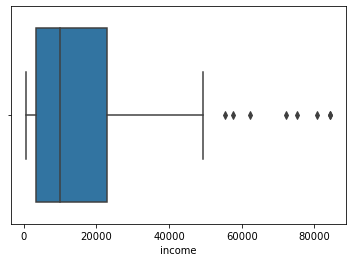

In [21]:
sns.boxplot(ngo['income'])

In [22]:
# Looking into 'gdpp': GDP per capita
ngo['gdpp'].describe(percentiles=[.25,.5,.75,.90,.99])

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
90%       41840.000000
99%       79088.000000
max      105000.000000
Name: gdpp, dtype: float64

In [23]:
ngo[ngo['gdpp'] > np.percentile(ngo['gdpp'],99) ]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,84374.0,3.62,81.3,1.63,105000
114,Norway,3.2,34856.6,8323.44,25023.0,62300.0,5.95,81.0,1.95,87800


#### Observation: 
- Similar to income, we will do the soft capping to these outliers which are beyond 99% percentiles and as those are not too many. Basically, we won't be removing any outliers.

In [24]:
ngo['gdpp'][ngo['gdpp']>=ngo['gdpp'].quantile(0.99)] = ngo['gdpp'].quantile(0.99)

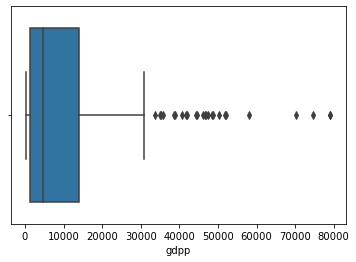

In [25]:
sns.boxplot(ngo['gdpp']);

### Checking Clustering Tendency through Hopkin's statistics

In [26]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
for i in range(10):
    print('Clustering tendency at random sample {0} : '.format(i+1),hopkins(ngo[cols]),end='\n')

Clustering tendency at random sample 1 :  0.9337270423865525
Clustering tendency at random sample 2 :  0.9607136932104093
Clustering tendency at random sample 3 :  0.9796770619756083
Clustering tendency at random sample 4 :  0.952483122756043
Clustering tendency at random sample 5 :  0.9635845312735247
Clustering tendency at random sample 6 :  0.9609025684886423
Clustering tendency at random sample 7 :  0.9881111658933848
Clustering tendency at random sample 8 :  0.9705498227798034
Clustering tendency at random sample 9 :  0.9396120518498003
Clustering tendency at random sample 10 :  0.966097150088443


#### Observations: 
- We checked the hopkin's statistics on 10 different randomly scattered datasets and everytime score is more than 94-95% (i.e. data is 94-95% different from randomly scattered data) which indicates that our dataset has very high tendency of forming a clusters.

### Scaling: using standardization

In [28]:
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo[cols])
ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [29]:
ngo_scaled = pd.DataFrame(ngo_scaled)
ngo_scaled.columns = cols
ngo_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.291375,-0.532363,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.104331,-0.178771,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [30]:
# Ignoring unnecessary columns before the final model building. Keeping only - gdpp, child_mort and income
ngo_scaled = ngo_scaled[['gdpp','child_mort','income']]
ngo_scaled.head()

,gdpp,child_mort,income
0,-0.702259,1.291532,-0.851668
1,-0.498726,-0.538949,-0.386946
2,-0.477434,-0.272833,-0.221053
3,-0.530950,2.007808,-0.612045
4,-0.032042,-0.695634,0.125254


### Finding the best value of k i.e. possible number of clusters using SSD (Elbow method) and Silhoutte score

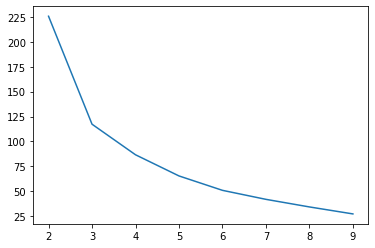

In [31]:
# Finding best value of k using SSD
ssd = []
range_n_cl = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_cl:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(ngo_scaled)
    ssd.append(kmeans.inertia_)
    
y = np.array([i for i in range(2,10,1)])
plt.plot(y,ssd)

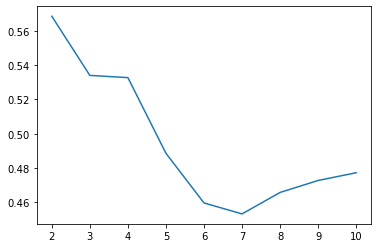

In [32]:
# Finding the best value of k using Silhouette Score
s = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(ngo_scaled)
    s.append([k, silhouette_score(ngo_scaled, kmean.labels_)])
    
ss_score = pd.DataFrame(s)
plt.plot(ss_score[0],ss_score[1]);

#### Observation:
- Its difficult to find the best value of 'k' using silhouette method, but we can clearly see that we can go with k=3 using elbow method. So we will build our clustering model for 3 clusters.

### Model Building - Using KMeans clustering

In [33]:
kmeans = KMeans(n_clusters=3,max_iter=50,random_state=0)
kmeans.fit(ngo_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [34]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [35]:
ngo['kmean_clusters'] = kmeans.labels_
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [36]:
# To see the distrbution of labels
ngo['kmean_clusters'].value_counts(normalize=True)

1    0.538922
0    0.269461
2    0.191617
Name: kmean_clusters, dtype: float64

### Visualizing the clusters

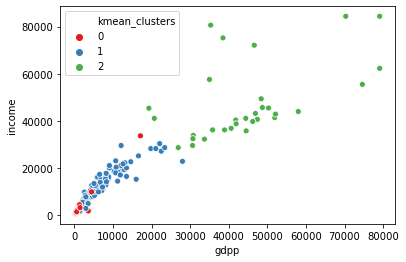

In [37]:
sns.scatterplot(x='gdpp',y='income',hue='kmean_clusters',data=ngo,palette='Set1');

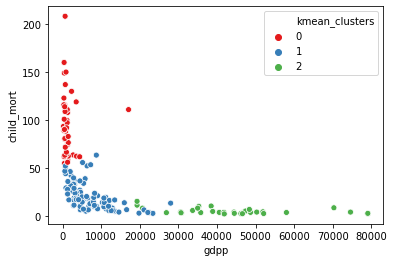

In [38]:
sns.scatterplot(x='gdpp',y='child_mort',hue='kmean_clusters',data=ngo,palette='Set1');

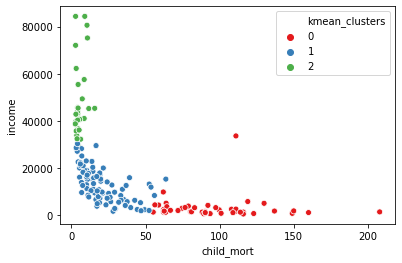

In [39]:
sns.scatterplot(x='child_mort',y='income',hue='kmean_clusters',data=ngo,palette='Set1');

#### Observation:
- We can clearly see 3 clusters in different combinations of scattered plots of gdpp, child_mort and income.
- We will mostly be looking into 'Red' cluster i.e. with label '0' i.e. which has low gdpp, low income and high child_mortality as those will be the countries which are in dire need of money.

### Cluster Profiling

In [40]:
ngo_grouped = ngo[['gdpp','child_mort','income','kmean_clusters']].groupby('kmean_clusters').mean()
ngo_grouped

,gdpp,child_mort,income
kmean_clusters,,,
0,1445.777778,95.368889,3144.511111
1,7300.600000,21.338889,12831.777778
2,44008.625000,5.593750,47464.000000


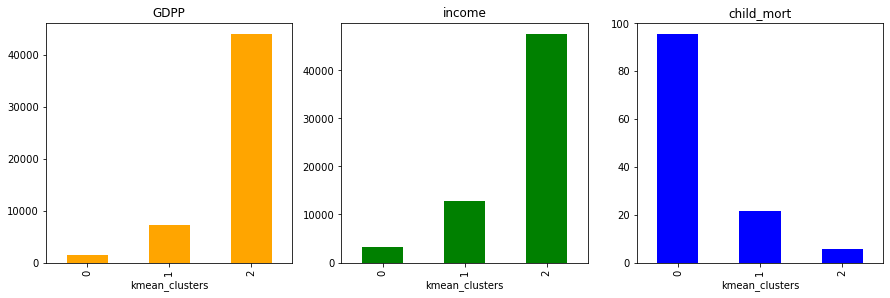

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
ngo_grouped['gdpp'].plot(kind='bar',color='orange',title='GDPP')
plt.subplot(3,3,2)
ngo_grouped['income'].plot(kind='bar',color='green',title='income')
plt.subplot(3,3,3)
ngo_grouped['child_mort'].plot(kind='bar',color='blue',title='child_mort')

#### Observation:
- We have used 3 separate bar charts to look at the distribution of cluster labels, as single chart wasn't giving proper view due to differences in units of these 3 variables.
- Now we can clearly see that we should be looking at the cluster label '0'
- And since we need to identify those countries which are in dire need of the aid, we need to choose a cluster which has low gdpp, low income per person and high child mortality rate. So, we can conclude from the above bar chart that, cluster with 0 label is a clear winner here and we need to identify top 5 countries which are in a dires need of the aid.

In [42]:
# Lets filter the data for cluster label '0'
cluster_poor = ngo[ngo['kmean_clusters']==0]
cluster_poor

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters
0,Afghanistan,90.2,55.30000,41.9174,248.297000,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.40400,31.0780,281.976000,1820.0,0.885,61.8,5.36,758.0,0
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.82000,67.2030,353.700000,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.09600,40.6341,390.195000,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.88500,34.6819,397.573000,1410.0,3.870,65.9,4.75,769.0,0
37,"Congo, Dem. Rep.",116.0,137.27400,26.4194,165.664000,609.0,20.800,57.5,6.54,334.0,0


In [43]:
# Lets sort the data as gdpp: low to High, child_mort: High to Low, income: Low to High... 
# ... in order to get countries in priority order with the countries having dire need of this money
# Then just choose top 5 post sorting the data
cluster_poor.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0


#### Observation: Using KMeans clustering, we can see that below 5 countries are in the direst need of aid and we can report these countries to CEO of an NGO, so he can take appropriate actions.
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

### Model Building using - Hierarchical Clustering

In [44]:
ngo_scaled.head()

,gdpp,child_mort,income
0,-0.702259,1.291532,-0.851668
1,-0.498726,-0.538949,-0.386946
2,-0.477434,-0.272833,-0.221053
3,-0.530950,2.007808,-0.612045
4,-0.032042,-0.695634,0.125254


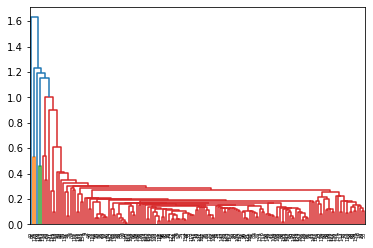

In [45]:
# Using Single linkage dendogram
dend = linkage(ngo_scaled,method='single',metric='euclidean')
dendrogram(dend)
plt.show();

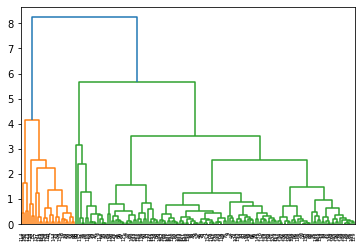

In [46]:
# Using Complete linkage dendogram
dend = linkage(ngo_scaled,method='complete',metric='euclidean')
dendrogram(dend)
plt.show();

#### Observation:
- Its difficult to get any info from single linkage dendrogram. But we can clearly see that clusters are formed nicely in complete linkage dendrogram.
- We can proceed ahead with k=3.

In [47]:
# Cutting the dendrogram at k=3 and getting the cluster labels to data
hier_labels = cut_tree(dend,n_clusters=3).reshape(-1,) 
hier_labels

array([0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# Adding label to original dataset
ngo['hier_labels'] = hier_labels
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters,hier_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [49]:
ngo['hier_labels'].value_counts(normalize=True)

0    0.742515
2    0.161677
1    0.095808
Name: hier_labels, dtype: float64

In [50]:
#Cluster profiling
ngo_grouped = ngo[['gdpp','child_mort','income','hier_labels']].groupby('hier_labels').mean()
ngo_grouped

,gdpp,child_mort,income
hier_labels,,,
0,6798.403226,33.566129,11198.403226
1,1988.250000,129.500000,4047.562500
2,46502.814815,5.811111,50438.814815


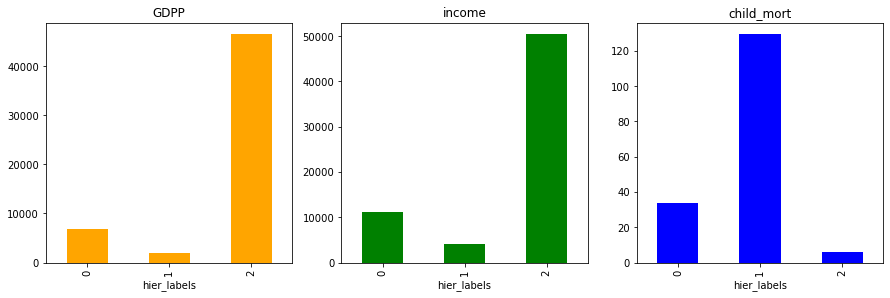

In [51]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
ngo_grouped['gdpp'].plot(kind='bar',color='orange',title='GDPP')
plt.subplot(3,3,2)
ngo_grouped['income'].plot(kind='bar',color='green',title='income')
plt.subplot(3,3,3)
ngo_grouped['child_mort'].plot(kind='bar',color='blue',title='child_mort')

#### Observation:
- Here we are interested in cluster label '1' i.e. low gdpp, low income and high child_mort

In [52]:
# Filtering the data for cluster label '1'
cluster_poor = ngo[ngo['hier_labels']==1]
cluster_poor

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters,hier_labels
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,1
28,Cameroon,108.0,290.820,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,1
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.54,334.0,0,1
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690.0,5.390,56.3,5.27,1220.0,0,1
49,Equatorial Guinea,111.0,14671.800,766.0800,10071.900,33700.0,24.900,60.9,5.21,17100.0,0,1
63,Guinea,109.0,196.344,31.9464,279.936,1190.0,16.100,58.0,5.34,648.0,0,1


In [53]:
cluster_poor.shape

(16, 12)

In [54]:
# Lets sort the data as gdpp: low to High, child_mort: High to Low, income: Low to High... 
# ... in order to get countries in priority order with the countries having dire need of this money
# Then just choose top 5 post sorting the data
cluster_poor.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_clusters,hier_labels
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,1
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,1
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390.0,2.97,55.6,5.05,547.0,0,1


#### Observation: Using hierarchical clustering, we can see that below 5 countries are in direst need of aid:
- Congo, Dem. Rep.
- Niger
- Sierra Leone
- Central Africal Republic
- Guinea-Bissau

P.S.: Also, we can see that out of above 5 countries, first 3 countries are also part of KMean clustering result.

#### Note: Using KMeans clustering, we can see that below 5 countries are in the direst need of aid and we can report these countries to CEO of an NGO, so he can take appropriate actions.
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

And we will go with these 5 countries to report to the CEO of an NGO.